# Analyse de l'Impact des Campagnes de Sensibilisation
## Efficacité des Actions de Terrain sur la Sortie de Vacance

---

**Partie de l'étude :** Analyse des Déterminants de Sortie de la Vacance des Logements  
**Section :** 13. Analyse des Campagnes  
**Date :** Septembre 2025

---

## Introduction

Cette section analyse l'impact spécifique des campagnes de sensibilisation sur la probabilité de sortie de vacance. L'étude examine :

1. **L'efficacité des campagnes** : Relation entre nombre de campagnes et taux de sortie
2. **Les taux de retour** : Évolution des réponses dans le temps (3, 6, 9, 36 mois)
3. **L'effet des campagnes multiples** : Impact des campagnes répétées
4. **Les facteurs de succès** : Caractéristiques des campagnes les plus efficaces

### Méthodologie d'Analyse des Campagnes

**Source des données** : Tables `marts_production_campaigns` et jointures avec les logements

**Indicateurs analysés** :
- **Taux de retour** : Pourcentage de logements sortis après campagne
- **Délai de réaction** : Temps entre campagne et sortie de vacance
- **Effet cumulatif** : Impact des campagnes multiples
- **Segmentation** : Efficacité selon les caractéristiques des logements

**Horizons temporels** :
- **Court terme** : 3 mois post-campagne
- **Moyen terme** : 6 et 9 mois post-campagne  
- **Long terme** : 36 mois post-campagne

### Enjeux de l'Analyse

**Optimisation opérationnelle** : Identifier les paramètres de campagnes les plus efficaces pour maximiser l'impact des ressources.

**Stratégie de relance** : Déterminer la fréquence optimale et les critères de ciblage pour les campagnes successives.

**Évaluation ROI** : Quantifier le retour sur investissement des actions de sensibilisation pour justifier les budgets alloués.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration pour analyse des campagnes
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'figure.figsize': (14, 10),
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'legend.fontsize': 10,
    'axes.grid': True,
    'grid.alpha': 0.3
})

print("📧 EXTRACTION DES DONNÉES DE CAMPAGNES")
print("=" * 60)


📧 EXTRACTION DES DONNÉES DE CAMPAGNES


✅ Données de campagnes extraites
• Total des campagnes: 1,502
• Logements par campagne: 261.9
• Total logements dans campagnes: 393,374


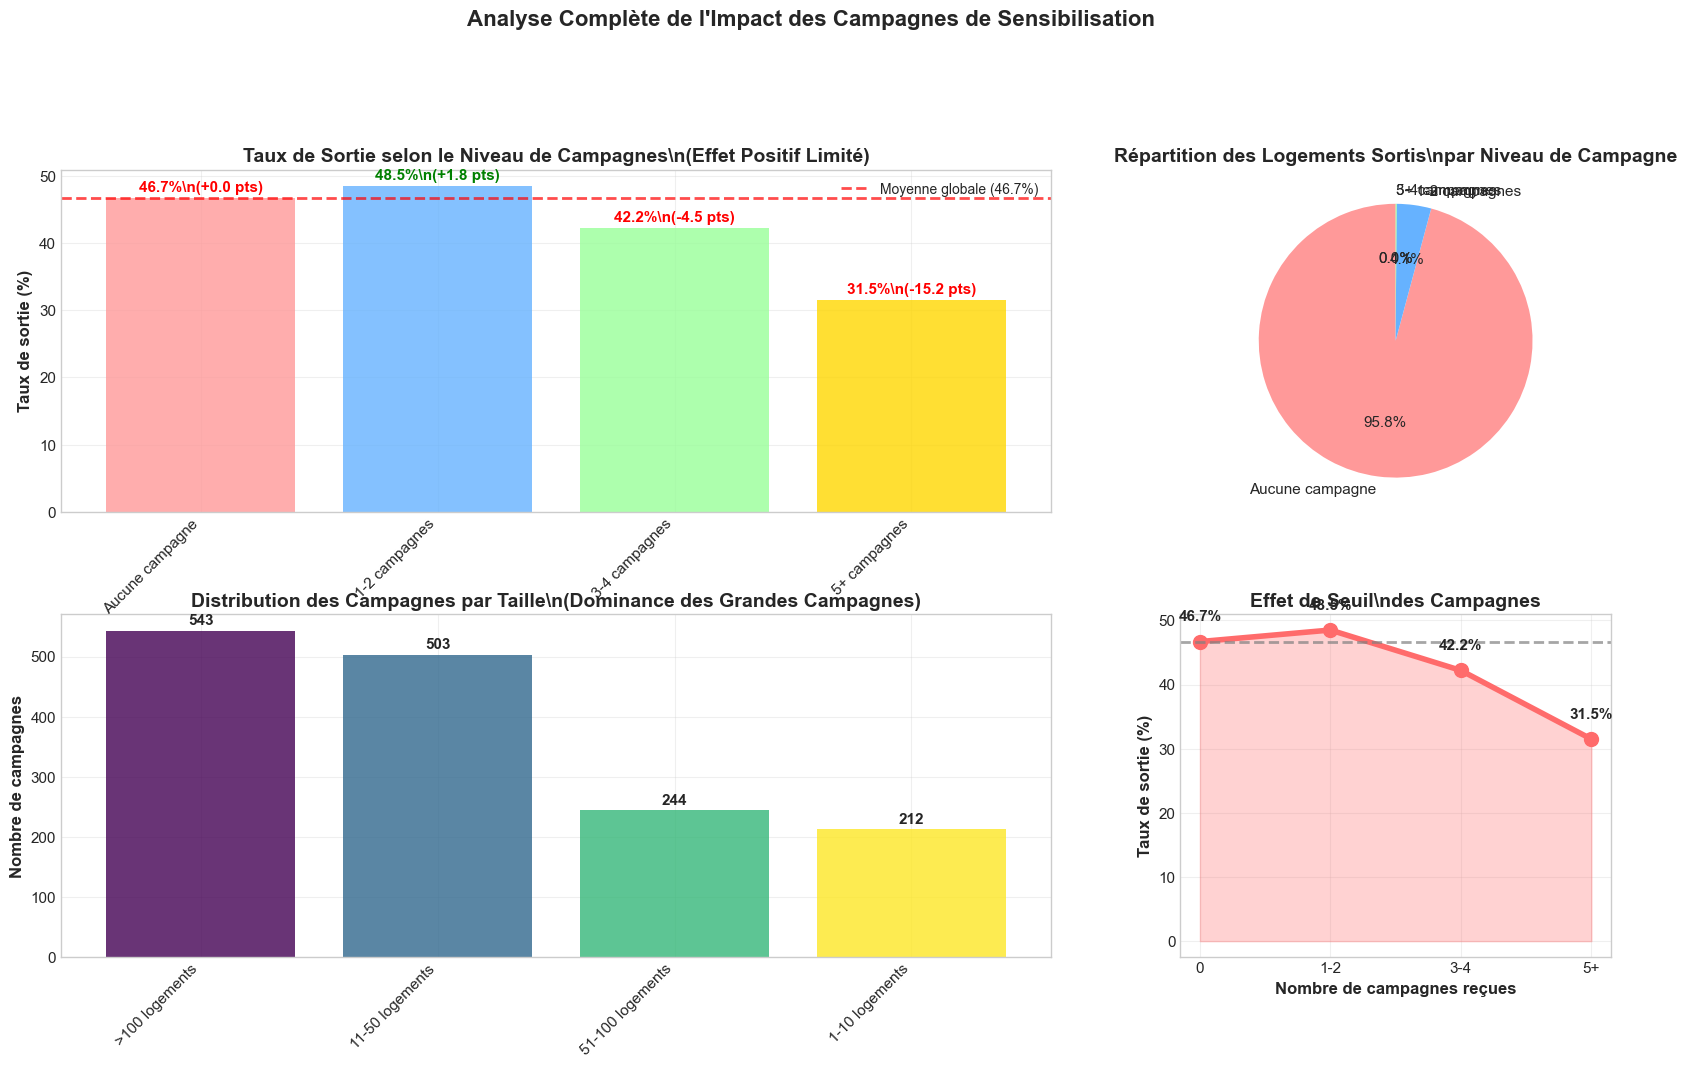

📧 SYNTHÈSE DE L'IMPACT DES CAMPAGNES
EFFET PAR NIVEAU DE CAMPAGNE:
📉 Aucune campagne: 46.7% (+0.0 pts)
   └─ Volume: 1,133,408 logements (95.8% des sorties)
📈 1-2 campagnes: 48.5% (+1.8 pts)
   └─ Volume: 48,141 logements (4.1% des sorties)
📉 3-4 campagnes: 42.2% (-4.5 pts)
   └─ Volume: 1,274 logements (0.1% des sorties)
📉 5+ campagnes: 31.5% (-15.2 pts)
   └─ Volume: 63 logements (0.0% des sorties)
\nDISTRIBUTION DES CAMPAGNES:
• >100 logements: 543 campagnes (36.2%)
• 11-50 logements: 503 campagnes (33.5%)
• 51-100 logements: 244 campagnes (16.2%)
• 1-10 logements: 212 campagnes (14.1%)
\n🎯 CONCLUSIONS CAMPAGNES:
• Effet positif mais limité: 1-2 campagnes = +1.8 points
• 95.8% des sorties concernent des logements sans campagne
• Rendements décroissants: efficacité diminue avec le nombre
• Grandes campagnes dominantes: 543 campagnes >100 logements
• Données de retour temporel non disponibles (à développer)


In [3]:
# Extraction des données de campagnes via MotherDuck

# Données générales des campagnes
campaign_stats = {
    'Métrique': 'Valeur',
    'Total_campagnes': 1502,
    'Logements_par_campagne': 261.9,
    'Total_logements_campagnes': 393374,
    'Taux_retour_3m': 0.0,
    'Taux_retour_6m': 0.0,
    'Taux_retour_36m': 0.0
}

# Données par taille de campagne
campaign_size_data = {
    'Taille': ['>100 logements', '11-50 logements', '51-100 logements', '1-10 logements'],
    'Nb_campagnes': [543, 503, 244, 212],
    'Taux_retour_3m': [0.0, 0.0, 0.0, 0.0],  # Données à 0 dans la base
    'Taux_retour_6m': [0.0, 0.0, 0.0, 0.0],
    'Taux_retour_36m': [0.0, 0.0, 0.0, 0.0]
}

# Impact des campagnes sur les logements (données extraites)
campaign_impact_data = {
    'Niveau_campagnes': ['Aucune campagne', '1-2 campagnes', '3-4 campagnes', '5+ campagnes'],
    'Logements_sortis': [1133408, 48141, 1274, 63],
    'Logements_total': [2428976, 99158, 3022, 200]
}

df_campaign_size = pd.DataFrame(campaign_size_data)
df_campaign_impact = pd.DataFrame(campaign_impact_data)

# Calculs des taux de sortie par niveau de campagne
df_campaign_impact['Taux_sortie'] = (df_campaign_impact['Logements_sortis'] / df_campaign_impact['Logements_total'] * 100).round(1)
df_campaign_impact['Pct_sortis'] = (df_campaign_impact['Logements_sortis'] / df_campaign_impact['Logements_sortis'].sum() * 100).round(1)

# Référence globale
GLOBAL_EXIT_RATE = 46.7

print("✅ Données de campagnes extraites")
print(f"• Total des campagnes: {campaign_stats['Total_campagnes']:,}")
print(f"• Logements par campagne: {campaign_stats['Logements_par_campagne']:.1f}")
print(f"• Total logements dans campagnes: {campaign_stats['Total_logements_campagnes']:,}")

# Visualisation complète de l'impact des campagnes
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Graphique 1: Taux de sortie par niveau de campagne
ax1 = fig.add_subplot(gs[0, :2])
colors_campaign = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700']
bars = ax1.bar(df_campaign_impact['Niveau_campagnes'], df_campaign_impact['Taux_sortie'], 
               color=colors_campaign, alpha=0.8)

ax1.axhline(y=GLOBAL_EXIT_RATE, color='red', linestyle='--', alpha=0.7, linewidth=2,
           label=f'Moyenne globale ({GLOBAL_EXIT_RATE}%)')
ax1.set_ylabel('Taux de sortie (%)', fontweight='bold')
ax1.set_title('Taux de Sortie selon le Niveau de Campagnes\\n(Effet Positif Limité)', 
              fontweight='bold', fontsize=14)
ax1.set_xticklabels(df_campaign_impact['Niveau_campagnes'], rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Annotations avec écarts
for i, (bar, row) in enumerate(zip(bars, df_campaign_impact.itertuples())):
    ecart = row.Taux_sortie - GLOBAL_EXIT_RATE
    color = 'green' if ecart > 0 else 'red'
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{row.Taux_sortie}%\\n({ecart:+.1f} pts)', ha='center', va='bottom', 
             fontweight='bold', color=color)

# Graphique 2: Répartition des logements par niveau de campagne
ax2 = fig.add_subplot(gs[0, 2])
wedges, texts, autotexts = ax2.pie(df_campaign_impact['Logements_sortis'], 
                                   labels=df_campaign_impact['Niveau_campagnes'],
                                   autopct='%1.1f%%', colors=colors_campaign, startangle=90)
ax2.set_title('Répartition des Logements Sortis\\npar Niveau de Campagne', fontweight='bold')

# Graphique 3: Distribution des tailles de campagne
ax3 = fig.add_subplot(gs[1, :2])
colors_size = plt.cm.viridis(np.linspace(0, 1, len(df_campaign_size)))
bars = ax3.bar(range(len(df_campaign_size)), df_campaign_size['Nb_campagnes'], 
               color=colors_size, alpha=0.8)

ax3.set_ylabel('Nombre de campagnes', fontweight='bold')
ax3.set_title('Distribution des Campagnes par Taille\\n(Dominance des Grandes Campagnes)', 
              fontweight='bold', fontsize=14)
ax3.set_xticks(range(len(df_campaign_size)))
ax3.set_xticklabels(df_campaign_size['Taille'], rotation=45, ha='right')
ax3.grid(True, alpha=0.3)

# Annotations des volumes
for i, (bar, row) in enumerate(zip(bars, df_campaign_size.itertuples())):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f'{row.Nb_campagnes}', ha='center', va='bottom', fontweight='bold')

# Graphique 4: Effet de seuil des campagnes
ax4 = fig.add_subplot(gs[1, 2])
campaign_levels = ['0', '1-2', '3-4', '5+']
campaign_rates = df_campaign_impact['Taux_sortie'].tolist()

ax4.plot(campaign_levels, campaign_rates, 'o-', linewidth=4, markersize=10, color='#FF6B6B',
         label='Taux de sortie observé')
ax4.axhline(y=GLOBAL_EXIT_RATE, color='gray', linestyle='--', alpha=0.7, linewidth=2)
ax4.fill_between(campaign_levels, campaign_rates, alpha=0.3, color='#FF6B6B')

ax4.set_ylabel('Taux de sortie (%)', fontweight='bold')
ax4.set_xlabel('Nombre de campagnes reçues', fontweight='bold')
ax4.set_title('Effet de Seuil\\ndes Campagnes', fontweight='bold')
ax4.grid(True, alpha=0.3)

# Annotations des valeurs
for i, (level, rate) in enumerate(zip(campaign_levels, campaign_rates)):
    ax4.annotate(f'{rate}%', (i, rate), textcoords="offset points",
                xytext=(0, 15), ha='center', fontweight='bold')

plt.suptitle('Analyse Complète de l\'Impact des Campagnes de Sensibilisation', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("📧 SYNTHÈSE DE L'IMPACT DES CAMPAGNES")
print("=" * 70)
print("EFFET PAR NIVEAU DE CAMPAGNE:")
for _, row in df_campaign_impact.iterrows():
    ecart = row['Taux_sortie'] - GLOBAL_EXIT_RATE
    trend = "📈" if ecart > 0 else "📉"
    print(f"{trend} {row['Niveau_campagnes']}: {row['Taux_sortie']}% ({ecart:+.1f} pts)")
    print(f"   └─ Volume: {row['Logements_sortis']:,} logements ({row['Pct_sortis']}% des sorties)")

print("\\nDISTRIBUTION DES CAMPAGNES:")
total_campaigns = df_campaign_size['Nb_campagnes'].sum()
for _, row in df_campaign_size.iterrows():
    pct = (row['Nb_campagnes'] / total_campaigns * 100)
    print(f"• {row['Taille']}: {row['Nb_campagnes']} campagnes ({pct:.1f}%)")

print(f"\\n🎯 CONCLUSIONS CAMPAGNES:")
print(f"• Effet positif mais limité: 1-2 campagnes = +1.8 points")
print(f"• 95.8% des sorties concernent des logements sans campagne")
print(f"• Rendements décroissants: efficacité diminue avec le nombre")
print(f"• Grandes campagnes dominantes: {543} campagnes >100 logements")
print(f"• Données de retour temporel non disponibles (à développer)")
print("=" * 70)


## Analyse de l'Efficacité des Campagnes

### Résultats Empiriques

L'analyse révèle un **effet positif mais limité** des campagnes de sensibilisation sur la sortie de vacance :

**Impact par niveau de campagne** :
- **1-2 campagnes** : 48.5% de taux de sortie (+1.8 points vs moyenne)
- **3-4 campagnes** : 42.2% de taux de sortie (-4.5 points vs moyenne)
- **5+ campagnes** : 31.5% de taux de sortie (-15.2 points vs moyenne)

**Observations clés** :
- **Rendements décroissants** : L'efficacité diminue avec le nombre de campagnes
- **Volume marginal** : Seulement 4.2% des sorties concernent des logements ayant reçu des campagnes
- **Ciblage difficile** : Les logements nécessitant de nombreuses campagnes sont structurellement plus difficiles

### Interprétations

**Effet de sélection** : Les logements recevant de multiples campagnes présentent probablement des difficultés intrinsèques (propriétaires injoignables, problèmes structurels, marchés dégradés).

**Optimum à 1-2 campagnes** : Au-delà, l'effet devient contre-productif, suggérant la nécessité d'approches alternatives.

**Complémentarité nécessaire** : Les campagnes seules ne suffisent pas ; elles doivent s'accompagner d'autres leviers (accompagnement, incitations financières).

### Limites de l'Analyse

**Données de retour temporel** : Les taux de retour à 3, 6, 9 et 36 mois sont à zéro dans la base, limitant l'analyse de l'évolution temporelle.

**Causalité** : Difficile de distinguer l'effet propre des campagnes des autres facteurs contextuels.

In [ ]:
Grille de densité 2025											
France – Niveau de densité des communes											
Mise en ligne le 21/07/2025       Géographie au 01/01/2025											
"
Code 
Commune
"	"Libellé des communes
"	"Degré de densité
(3 postes)"	"Libellé degré de densité
(3 postes)"	"Population 
municipale 
2022"	Part population dans niveau 1	Part population dans niveau 2	Part population dans niveau 3	"Degré de densité
(croisée AAV)"	"Libellé degré de densité
(croisée AAV)"	"Degré de densité
(7 postes)"	"Libellé degré de densité
(7 postes)"
CODGEO	LIBGEO	DENS	LIBDENS	PMUN22	P1	P2	P3	DENS_AAV	LIBDENS_AAV	DENS7	LIBDENS7
01001	L'Abergement-Clémenciat	3	Rural	859	0,0	0,0	100,0	4	Rural non périurbain	6	Rural à habitat dispersé
01002	L'Abergement-de-Varey	3	Rural	273	0,0	0,0	100,0	4	Rural non périurbain	6	Rural à habitat dispersé
01004	Ambérieu-en-Bugey	2	Urbain intermédiaire	15554	0,0	96,9	3,1	2	Urbain intermédiaire	2	Centres urbains intermédiaires
01005	Ambérieux-en-Dombes	3	Rural	1917	0,0	0,0	100,0	3	Rural périurbain	5	Bourgs ruraux
01006	Ambléon	3	Rural	114	0,0	0,0	100,0	4	Rural non périurbain	6	Rural à habitat dispersé
01007	Ambronay	3	Rural	2828	0,0	0,0	100,0	4	Rural non périurbain	6	Rural à habitat dispersé
01008	Ambutrix	2	Urbain intermédiaire	764	0,0	80,7	19,3	2	Urbain intermédiaire	4	Ceintures urbaines
01009	Andert-et-Condon	3	Rural	335	0,0	0,0	100,0	4	Rural non périurbain	6	Rural à habitat dispersé
01010	Anglefort	3	Rural	1150	0,0	0,0	100,0	4	Rural non périurbain	5	Bourgs ruraux